In [1]:
import sys
# sys.path

In [2]:
import model
import pickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

In [8]:
def visualize_som(som, columns, labels = ["", ""], dim = 10):
    reshaped_x = som.w[:, columns[0]].reshape(dim, dim)
    reshaped_y = som.w[:, columns[1]].reshape(dim, dim)
    for v in range(dim):
        plt.plot(reshaped_x[:, v].numpy(), reshaped_y[:, v].numpy(), marker='None', linestyle='-', color='blue')
        plt.plot(reshaped_x[v, :].numpy(), reshaped_y[v, :].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(som.w[:, columns[0]].numpy(), som.w[:, columns[1]].numpy(), marker='o', color='blue')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()

# Pose Somatotopic Cartpole Control

## State Weight Visualization

In [5]:
state_filehandler = open("../data/pose_somatotopic/cartpole/state_som.obj", 'rb')
state_model = pickle.load(state_filehandler)
state_model.w.shape

torch.Size([100, 3])

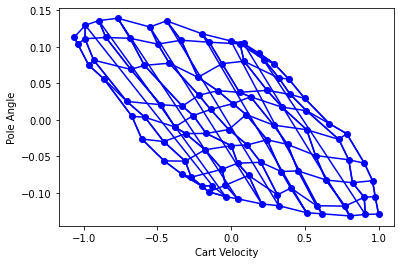

In [5]:
visualize_som(state_model, [0, 1], ["Cart Velocity", "Pole Angle"])

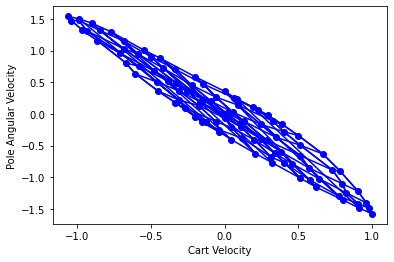

In [6]:
visualize_som(state_model, [0, 2], ["Cart Velocity", "Pole Angular Velocity"])

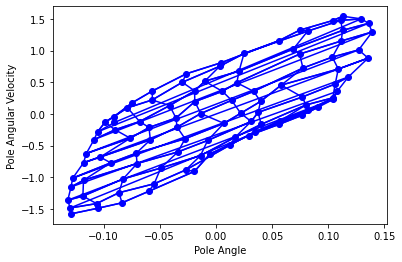

In [7]:
visualize_som(state_model, [1, 2], ["Pole Angle", "Pole Angular Velocity"])

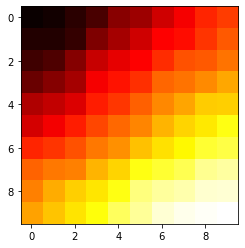

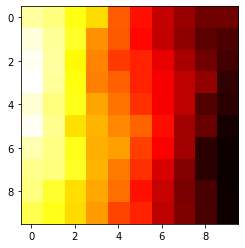

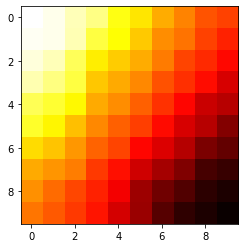

In [6]:
plt.imshow(state_model.w[:, 0].reshape(10, 10), cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(state_model.w[:, 1].reshape(10, 10), cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(state_model.w[:, 2].reshape(10, 10), cmap='hot', interpolation='nearest')
plt.show()

## Worker Visualization

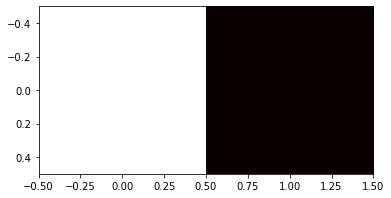

In [8]:
worker_filehandler = open("../data/pose_somatotopic/cartpole/worker_som.obj", 'rb')
worker_model = pickle.load(worker_filehandler)
worker_heatmap = worker_model.w.reshape(1, 2)
plt.imshow(worker_heatmap, cmap='hot', interpolation='nearest')
plt.show()

## Manager Visualization

path exception


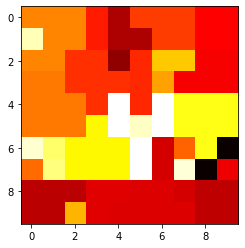

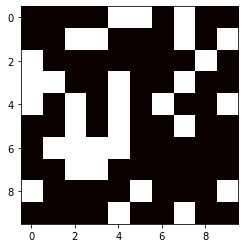

In [9]:
manager_filehandler = open("../data/pose_somatotopic/cartpole/manager_som.obj", 'rb')
manager_model = pickle.load(manager_filehandler)
manager_state = np.argmax(manager_model.w[:, :100], axis = 1).reshape(10, 10)
plt.imshow(manager_state, cmap='hot', interpolation='nearest')
plt.show()
manager_action = np.argmax(manager_model.w[:, 100:], axis = 1).reshape(10, 10)
plt.imshow(manager_action, cmap='hot', interpolation='nearest')
plt.show()

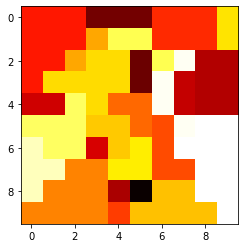

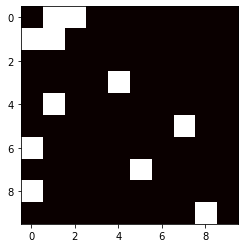

In [11]:
manager_all_neighbors_filehandler = open("../data/pose_somatotopic/cartpole/manager_som_all_neighbors.obj", 'rb')
manager_all_neighbors_model = pickle.load(manager_all_neighbors_filehandler)
manager_all_neighbors_state = np.argmax(manager_all_neighbors_model.w[:, :100], axis = 1).reshape(10, 10)
plt.imshow(manager_all_neighbors_state, cmap='hot', interpolation='nearest')
plt.show()
manager_all_neighbors_action = np.argmax(manager_all_neighbors_model.w[:, 100:], axis = 1).reshape(10, 10)
plt.imshow(manager_all_neighbors_action, cmap='hot', interpolation='nearest')
plt.show()

path exception


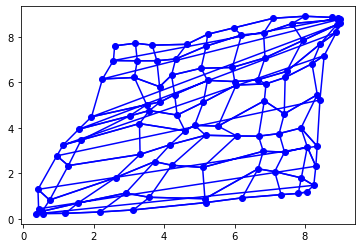

In [10]:
manager_position_filehandler = open("../data/pose_somatotopic/cartpole/manager_som_position.obj", 'rb')
manager_position_model = pickle.load(manager_position_filehandler)
visualize_som(manager_position_model, [0, 1])

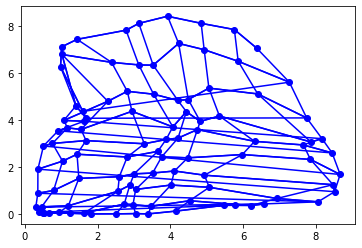

In [9]:
manager_position_all_neighbors_filehandler = open("../data/pose_somatotopic/cartpole/manager_som_position_all_neighbors.obj", 'rb')
manager_position_all_neighbors_model = pickle.load(manager_position_all_neighbors_filehandler)
visualize_som(manager_position_all_neighbors_model, [0, 1])

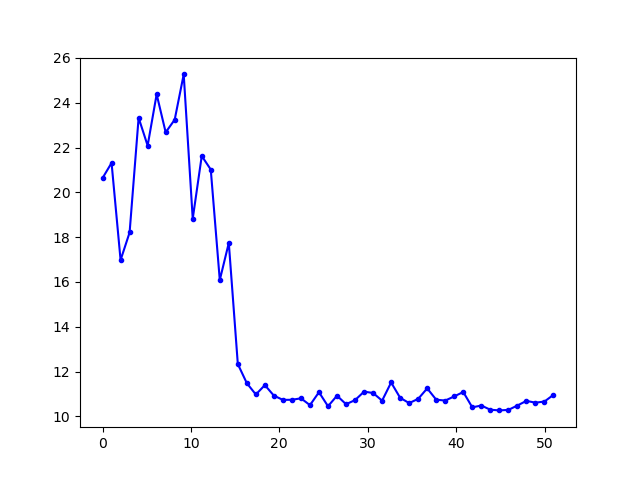

In [11]:
Image(filename='../data/pose_somatotopic/cartpole/cartpole_returns.png')

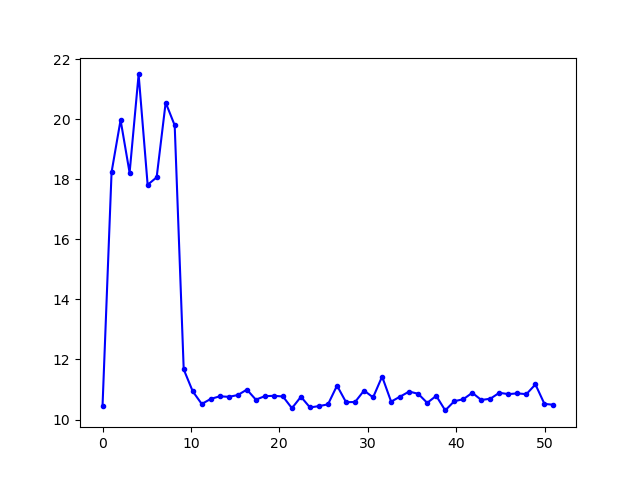

In [14]:
Image(filename='../data/pose_somatotopic/cartpole/cartpole_returns_all_neighbors.png')

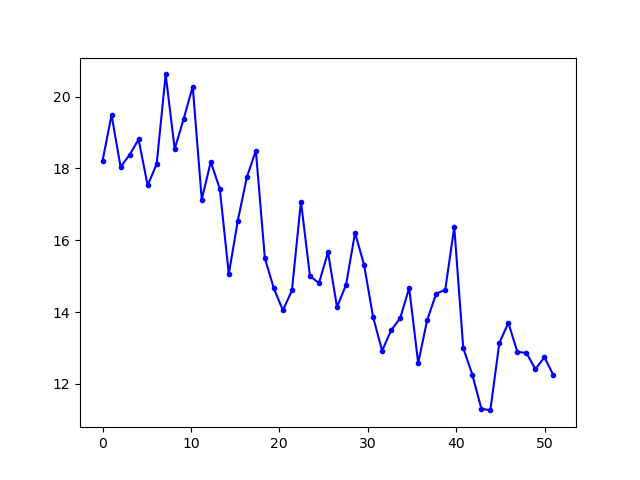

In [12]:
Image(filename='../data/pose_somatotopic/cartpole/cartpole_positions_returns.png')

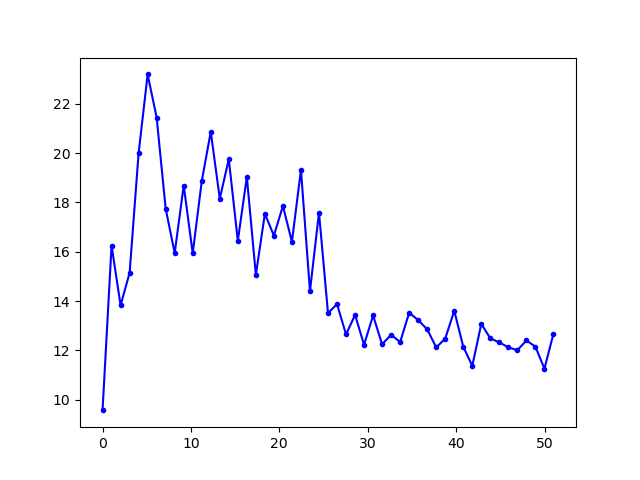

In [15]:
Image(filename='../data/pose_somatotopic/cartpole/cartpole_positions_all_neighbors_returns.png')

# Affordance Pose Somatotopic Cartpole Control

In [19]:
affordance_filehandler = open("../data/pose_somatotopic/cartpole/affordance_wsm_position_all_neighbors.obj", 'rb')
affordance_state_model, affordance_worker_model, affordance_manager_model = pickle.load(affordance_filehandler)
print(affordance_state_model.w.shape)
print(affordance_worker_model.w.shape)
print(affordance_manager_model.w.shape)

torch.Size([100, 3])
torch.Size([2, 1])
torch.Size([100, 4])


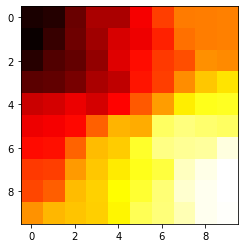

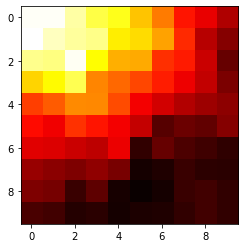

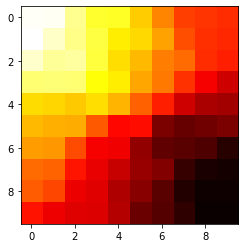

In [20]:
plt.imshow(affordance_state_model.w[:, 0].reshape(10, 10), cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(affordance_state_model.w[:, 1].reshape(10, 10), cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(affordance_state_model.w[:, 2].reshape(10, 10), cmap='hot', interpolation='nearest')
plt.show()

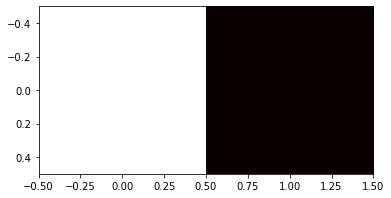

In [21]:
plt.imshow(affordance_worker_model.w.reshape(1, 2), cmap='hot', interpolation='nearest')
plt.show()

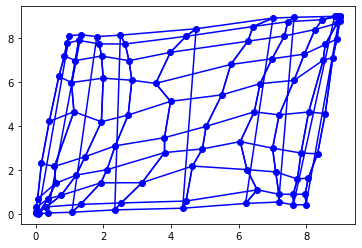

In [22]:
visualize_som(affordance_manager_model, [0, 1])

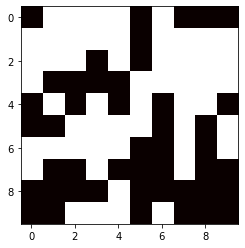

In [26]:
affordance_action = np.argmax(affordance_manager_model.w[:, 2:], axis = 1).reshape(10, 10)
plt.imshow(affordance_action, cmap='hot', interpolation='nearest')
plt.show()

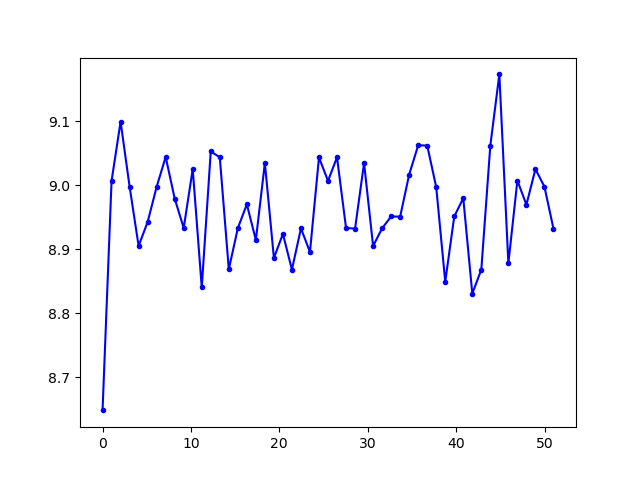

In [28]:
Image(filename='../data/pose_somatotopic/cartpole/affordance_cartpole_positions_all_neighbors_returns.png')